# 1.Importation des données

In [9]:
import pandas as pd
data = pd.read_csv(filepath_or_buffer = 'kidney_disease.csv',	# chemin du fichier
                       	sep = ',',                	# caractère séparant les valeurs
                       	header = 0,               	# numéro de la ligne contenant le nom des colonnes
                       	index_col = 'id') # nom de la colonne qui indexe les entrées

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 2.Exploration des données

In [11]:
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
display(data.describe())
display(data.info())


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


None

# **3. Nettoyage des données**

In [12]:
colonnes_na =data.isna().any(axis = 0)
print (colonnes_na.sum(), "les colonnes avec NAN: ")
data.isna().sum()

24 les colonnes avec NAN: 


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [14]:
for column in data.columns:
    display(f'Colonne {column}', data[column].unique())

'Colonne age'

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

'Colonne bp'

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

'Colonne sg'

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

'Colonne al'

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

'Colonne su'

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

'Colonne rbc'

array([nan, 'normal', 'abnormal'], dtype=object)

'Colonne pc'

array(['normal', 'abnormal', nan], dtype=object)

'Colonne pcc'

array(['notpresent', 'present', nan], dtype=object)

'Colonne ba'

array(['notpresent', 'present', nan], dtype=object)

'Colonne bgr'

array([121.,  nan, 423., 117., 106.,  74., 100., 410., 138.,  70., 490.,
       380., 208.,  98., 157.,  76.,  99., 114., 263., 173.,  95., 108.,
       156., 264., 123.,  93., 107., 159., 140., 171., 270.,  92., 137.,
       204.,  79., 207., 124., 144.,  91., 162., 246., 253., 141., 182.,
        86., 150., 146., 425., 112., 250., 360., 163., 129., 133., 102.,
       158., 165., 132., 104., 127., 415., 169., 251., 109., 280., 210.,
       219., 295.,  94., 172., 101., 298., 153.,  88., 226., 143., 115.,
        89., 297., 233., 294., 323., 125.,  90., 308., 118., 224., 128.,
       122., 214., 213., 268., 256.,  84., 105., 288., 139.,  78., 273.,
       242., 424., 303., 148., 160., 192., 307., 220., 447., 309.,  22.,
       111., 261., 215., 234., 131., 352.,  80., 239., 110., 130., 184.,
       252., 113., 230., 341., 255., 103., 238., 248., 120., 241., 269.,
       201., 203., 463., 176.,  82., 119.,  97.,  96.,  81., 116., 134.,
        85.,  83.,  87.,  75.])

'Colonne bu'

array([ 36. ,  18. ,  53. ,  56. ,  26. ,  25. ,  54. ,  31. ,  60. ,
       107. ,  55. ,  72. ,  86. ,  90. , 162. ,  46. ,  87. ,  27. ,
       148. , 180. , 163. ,   nan,  50. ,  75. ,  45. ,  28. , 155. ,
        33. ,  39. , 153. ,  29. ,  65. , 103. ,  70. ,  80. ,  20. ,
       202. ,  77. ,  89. ,  24. ,  17. ,  32. , 114. ,  66. ,  38. ,
       164. , 142. ,  96. , 391. ,  15. , 111. ,  73. ,  19. ,  92. ,
        35. ,  16. , 139. ,  48. ,  85. ,  98. , 186. ,  37. ,  47. ,
        52. ,  82. ,  51. , 106. ,  22. , 217. ,  88. , 118. ,  50.1,
        71. ,  34. ,  40. ,  21. , 219. ,  30. , 125. , 166. ,  49. ,
       208. , 176. ,  68. , 145. , 165. , 322. ,  23. , 235. , 132. ,
        76. ,  42. ,  44. ,  41. , 113. ,   1.5, 146. ,  58. , 133. ,
       137. ,  67. , 115. , 223. ,  98.6, 158. ,  94. ,  74. , 150. ,
        61. ,  57. ,  95. , 191. ,  93. , 241. ,  64. ,  79. , 215. ,
       309. ,  10. ])

'Colonne sc'

array([ 1.2 ,  0.8 ,  1.8 ,  3.8 ,  1.4 ,  1.1 , 24.  ,  1.9 ,  7.2 ,
        4.  ,  2.7 ,  2.1 ,  4.6 ,  4.1 ,  9.6 ,  2.2 ,  5.2 ,  1.3 ,
        1.6 ,  3.9 , 76.  ,  7.7 ,   nan,  2.4 ,  7.3 ,  1.5 ,  2.5 ,
        2.  ,  3.4 ,  0.7 ,  1.  , 10.8 ,  6.3 ,  5.9 ,  0.9 ,  3.  ,
        3.25,  9.7 ,  6.4 ,  3.2 , 32.  ,  0.6 ,  6.1 ,  3.3 ,  6.7 ,
        8.5 ,  2.8 , 15.  ,  2.9 ,  1.7 ,  3.6 ,  5.6 ,  6.5 ,  4.4 ,
       10.2 , 11.5 ,  0.5 , 12.2 ,  5.3 ,  9.2 , 13.8 , 16.9 ,  6.  ,
        7.1 , 18.  ,  2.3 , 13.  , 48.1 , 14.2 , 16.4 ,  2.6 ,  7.5 ,
        4.3 , 18.1 , 11.8 ,  9.3 ,  6.8 , 13.5 , 12.8 , 11.9 , 12.  ,
       13.4 , 15.2 , 13.3 ,  0.4 ])

'Colonne sod'

array([  nan, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
       141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
       125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
       147. , 124. , 115. , 145. , 113. , 120. , 150. , 144. ])

'Colonne pot'

array([ nan,  2.5,  3.2,  4. ,  3.7,  4.2,  5.8,  3.4,  6.4,  4.9,  4.1,
        4.3,  5.2,  3.8,  4.6,  3.9,  4.7,  5.9,  4.8,  4.4,  6.6, 39. ,
        5.5,  5. ,  3.5,  3.6,  7.6,  2.9,  4.5,  5.7,  5.4,  5.3, 47. ,
        6.3,  5.1,  5.6,  3. ,  2.8,  2.7,  6.5,  3.3])

'Colonne hemo'

array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9,  nan, 11.1,
        9.9, 12.5, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6,
       13.6, 10.2, 10.5,  6.6, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1,
       11.9, 13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. ,
       11.8, 11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,
        9. ,  8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8,
       11.5,  7.3, 13.7, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5,
       16.2, 14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9,
       16. , 14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 15.3,
       17.3, 17.4, 17.7, 17.8, 17.5, 17.6])

'Colonne pcv'

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

'Colonne wc'

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

'Colonne rc'

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

'Colonne htn'

array(['yes', 'no', nan], dtype=object)

'Colonne dm'

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

'Colonne cad'

array(['no', 'yes', '\tno', nan], dtype=object)

'Colonne appet'

array(['good', 'poor', nan], dtype=object)

'Colonne pe'

array(['no', 'yes', nan], dtype=object)

'Colonne ane'

array(['no', 'yes', nan], dtype=object)

'Colonne classification'

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [15]:
data = data.replace('\t?', '0')
data = data.replace('\43', '43')
data = data.replace('\6200', '6200')
data = data.replace('\8400', '8400')

In [16]:
data['wc'].fillna(0, inplace=True)
data['pcv'].fillna(0, inplace=True)
data['rc'].fillna(0.0, inplace=True)
data.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [17]:
data['wc'] = data['wc'].astype('int')
data['pcv'] = data['pcv'].astype('int')
data['rc'] = data['rc'].astype('float64')

Il est facile de remarquer que certaines colonnes contiennent des valeurs manquantes.
Il va donc falloir les traiter selon que les variables soient de type numériques ou catégorielles.


In [18]:
#Identifier les noms des variables catégorielles et numériques dans deux listes
num_df = data.select_dtypes(include=[np.number])
num_df.info()
cat_data =data.select_dtypes(include=[object])
cat_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sc      383 non-null    float64
 8   sod     313 non-null    float64
 9   pot     312 non-null    float64
 10  hemo    348 non-null    float64
 11  pcv     400 non-null    int32  
 12  wc      400 non-null    int32  
 13  rc      400 non-null    float64
dtypes: float64(12), int32(2)
memory usage: 43.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rbc             248 non-null    object
 1   pc              335

Pour toutes les variables numériques, je remplace les valeurs manquantes par la moyenne de chaque variable:

In [19]:
num_df.isnull().sum(axis=0)
num_df.fillna(num_df.mean(),inplace=True)
num_df.isnull().sum(axis=0)


age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [20]:
#Comme nous avons remplacer les NaN pour le changement de type de 3 collone  Calculez la moyenne des valeurs non nulles dans la colonne 'pcv'
mean_pcv = num_df['pcv'][num_df['pcv'] != 0].mean()
mean_wc = num_df['wc'][num_df['wc'] != 0].mean()
mean_rc = num_df['rc'][num_df['rc'] != 0].mean()
# Remplacez les valeurs nulles (0) par la moyenne 'mean_pcv' dans la colonne 'pcv'
num_df['pcv'].replace(0, mean_pcv, inplace=True)
num_df['wc'].replace(0, mean_wc, inplace=True)
num_df['rc'].replace(0, mean_rc, inplace=True)

In [21]:
for column in num_df.columns:
    display(f'Colonne {column}', num_df[column].unique())

'Colonne age'

array([48.        ,  7.        , 62.        , 51.        , 60.        ,
       68.        , 24.        , 52.        , 53.        , 50.        ,
       63.        , 40.        , 47.        , 61.        , 21.        ,
       42.        , 75.        , 69.        , 51.48337596, 73.        ,
       70.        , 65.        , 76.        , 72.        , 82.        ,
       46.        , 45.        , 35.        , 54.        , 11.        ,
       59.        , 67.        , 15.        , 55.        , 44.        ,
       26.        , 64.        , 56.        ,  5.        , 74.        ,
       38.        , 58.        , 71.        , 34.        , 17.        ,
       12.        , 43.        , 41.        , 57.        ,  8.        ,
       39.        , 66.        , 81.        , 14.        , 27.        ,
       83.        , 30.        ,  4.        ,  3.        ,  6.        ,
       32.        , 80.        , 49.        , 90.        , 78.        ,
       19.        ,  2.        , 33.        , 36.        , 37.  

'Colonne bp'

array([ 80.        ,  50.        ,  70.        ,  90.        ,
        76.46907216, 100.        ,  60.        , 110.        ,
       140.        , 180.        , 120.        ])

'Colonne sg'

array([1.02      , 1.01      , 1.005     , 1.015     , 1.01740793,
       1.025     ])

'Colonne al'

array([1.        , 4.        , 2.        , 3.        , 0.        ,
       1.01694915, 5.        ])

'Colonne su'

array([0.        , 3.        , 4.        , 1.        , 0.45014245,
       2.        , 5.        ])

'Colonne bgr'

array([121.        , 148.03651685, 423.        , 117.        ,
       106.        ,  74.        , 100.        , 410.        ,
       138.        ,  70.        , 490.        , 380.        ,
       208.        ,  98.        , 157.        ,  76.        ,
        99.        , 114.        , 263.        , 173.        ,
        95.        , 108.        , 156.        , 264.        ,
       123.        ,  93.        , 107.        , 159.        ,
       140.        , 171.        , 270.        ,  92.        ,
       137.        , 204.        ,  79.        , 207.        ,
       124.        , 144.        ,  91.        , 162.        ,
       246.        , 253.        , 141.        , 182.        ,
        86.        , 150.        , 146.        , 425.        ,
       112.        , 250.        , 360.        , 163.        ,
       129.        , 133.        , 102.        , 158.        ,
       165.        , 132.        , 104.        , 127.        ,
       415.        , 169.        , 251.        , 109.  

'Colonne bu'

array([ 36.        ,  18.        ,  53.        ,  56.        ,
        26.        ,  25.        ,  54.        ,  31.        ,
        60.        , 107.        ,  55.        ,  72.        ,
        86.        ,  90.        , 162.        ,  46.        ,
        87.        ,  27.        , 148.        , 180.        ,
       163.        ,  57.42572178,  50.        ,  75.        ,
        45.        ,  28.        , 155.        ,  33.        ,
        39.        , 153.        ,  29.        ,  65.        ,
       103.        ,  70.        ,  80.        ,  20.        ,
       202.        ,  77.        ,  89.        ,  24.        ,
        17.        ,  32.        , 114.        ,  66.        ,
        38.        , 164.        , 142.        ,  96.        ,
       391.        ,  15.        , 111.        ,  73.        ,
        19.        ,  92.        ,  35.        ,  16.        ,
       139.        ,  48.        ,  85.        ,  98.        ,
       186.        ,  37.        ,  47.        ,  52.  

'Colonne sc'

array([ 1.2       ,  0.8       ,  1.8       ,  3.8       ,  1.4       ,
        1.1       , 24.        ,  1.9       ,  7.2       ,  4.        ,
        2.7       ,  2.1       ,  4.6       ,  4.1       ,  9.6       ,
        2.2       ,  5.2       ,  1.3       ,  1.6       ,  3.9       ,
       76.        ,  7.7       ,  3.07245431,  2.4       ,  7.3       ,
        1.5       ,  2.5       ,  2.        ,  3.4       ,  0.7       ,
        1.        , 10.8       ,  6.3       ,  5.9       ,  0.9       ,
        3.        ,  3.25      ,  9.7       ,  6.4       ,  3.2       ,
       32.        ,  0.6       ,  6.1       ,  3.3       ,  6.7       ,
        8.5       ,  2.8       , 15.        ,  2.9       ,  1.7       ,
        3.6       ,  5.6       ,  6.5       ,  4.4       , 10.2       ,
       11.5       ,  0.5       , 12.2       ,  5.3       ,  9.2       ,
       13.8       , 16.9       ,  6.        ,  7.1       , 18.        ,
        2.3       , 13.        , 48.1       , 14.2       , 16.4 

'Colonne sod'

array([137.52875399, 111.        , 142.        , 104.        ,
       114.        , 131.        , 138.        , 135.        ,
       130.        , 141.        , 139.        ,   4.5       ,
       136.        , 129.        , 140.        , 132.        ,
       133.        , 134.        , 125.        , 163.        ,
       137.        , 128.        , 143.        , 127.        ,
       146.        , 126.        , 122.        , 147.        ,
       124.        , 115.        , 145.        , 113.        ,
       120.        , 150.        , 144.        ])

'Colonne pot'

array([ 4.62724359,  2.5       ,  3.2       ,  4.        ,  3.7       ,
        4.2       ,  5.8       ,  3.4       ,  6.4       ,  4.9       ,
        4.1       ,  4.3       ,  5.2       ,  3.8       ,  4.6       ,
        3.9       ,  4.7       ,  5.9       ,  4.8       ,  4.4       ,
        6.6       , 39.        ,  5.5       ,  5.        ,  3.5       ,
        3.6       ,  7.6       ,  2.9       ,  4.5       ,  5.7       ,
        5.4       ,  5.3       , 47.        ,  6.3       ,  5.1       ,
        5.6       ,  3.        ,  2.8       ,  2.7       ,  6.5       ,
        3.3       ])

'Colonne hemo'

array([15.4       , 11.3       ,  9.6       , 11.2       , 11.6       ,
       12.2       , 12.4       , 10.8       ,  9.5       ,  9.4       ,
        9.7       ,  9.8       ,  5.6       ,  7.6       , 12.6       ,
       12.1       , 12.7       , 10.3       ,  7.7       , 10.9       ,
       12.52643678, 11.1       ,  9.9       , 12.5       , 12.9       ,
       10.1       , 12.        , 13.        ,  7.9       ,  9.3       ,
       15.        , 10.        ,  8.6       , 13.6       , 10.2       ,
       10.5       ,  6.6       , 11.        ,  7.5       , 15.6       ,
       15.2       ,  4.8       ,  9.1       ,  8.1       , 11.9       ,
       13.5       ,  8.3       ,  7.1       , 16.1       , 10.4       ,
        9.2       ,  6.2       , 13.9       , 14.1       ,  6.        ,
       11.8       , 11.7       , 11.4       , 14.        ,  8.2       ,
       13.2       ,  6.1       ,  8.        , 12.3       ,  8.4       ,
       14.3       ,  9.        ,  8.7       , 10.6       , 13.1 

'Colonne pcv'

array([44.        , 38.        , 31.        , 32.        , 35.        ,
       39.        , 36.        , 33.        , 29.        , 28.        ,
       38.88449848, 16.        , 24.        , 37.        , 30.        ,
       34.        , 40.        , 45.        , 27.        , 48.        ,
       52.        , 14.        , 22.        , 18.        , 42.        ,
       17.        , 46.        , 23.        , 19.        , 25.        ,
       41.        , 26.        , 15.        , 21.        , 43.        ,
       20.        , 47.        ,  9.        , 49.        , 50.        ,
       53.        , 51.        , 54.        ])

'Colonne wc'

array([ 7800.        ,  6000.        ,  7500.        ,  6700.        ,
        7300.        ,  8406.12244898,  6900.        ,  9600.        ,
       12100.        ,  4500.        , 12200.        , 11000.        ,
        3800.        , 11400.        ,  5300.        ,  9200.        ,
        6200.        ,  8300.        ,  8400.        , 10300.        ,
        9800.        ,  9100.        ,  7900.        ,  6400.        ,
        8600.        , 18900.        , 21600.        ,  4300.        ,
        8500.        , 11300.        ,  7200.        ,  7700.        ,
       14600.        ,  6300.        ,  7100.        , 11800.        ,
        9400.        ,  5500.        ,  5800.        , 13200.        ,
       12500.        ,  5600.        ,  7000.        , 11900.        ,
       10400.        , 10700.        , 12700.        ,  6800.        ,
        6500.        , 13600.        , 10200.        ,  9000.        ,
       14900.        ,  8200.        , 15200.        ,  5000.        ,
      

'Colonne rc'

array([5.2       , 4.70743494, 3.9       , 4.6       , 4.4       ,
       5.        , 4.        , 3.7       , 3.8       , 3.4       ,
       2.6       , 2.8       , 4.3       , 3.2       , 3.6       ,
       4.1       , 4.9       , 2.5       , 4.2       , 4.5       ,
       3.1       , 4.7       , 3.5       , 6.        , 2.1       ,
       5.6       , 2.3       , 2.9       , 2.7       , 8.        ,
       3.3       , 3.        , 2.4       , 4.8       , 5.4       ,
       6.1       , 6.2       , 6.3       , 5.1       , 5.8       ,
       5.5       , 5.3       , 6.4       , 5.7       , 5.9       ,
       6.5       ])

In [22]:
num_df.isna().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [26]:
num_df.to_csv('clean_data_num.csv')

#4. Distibution des variables numèriques

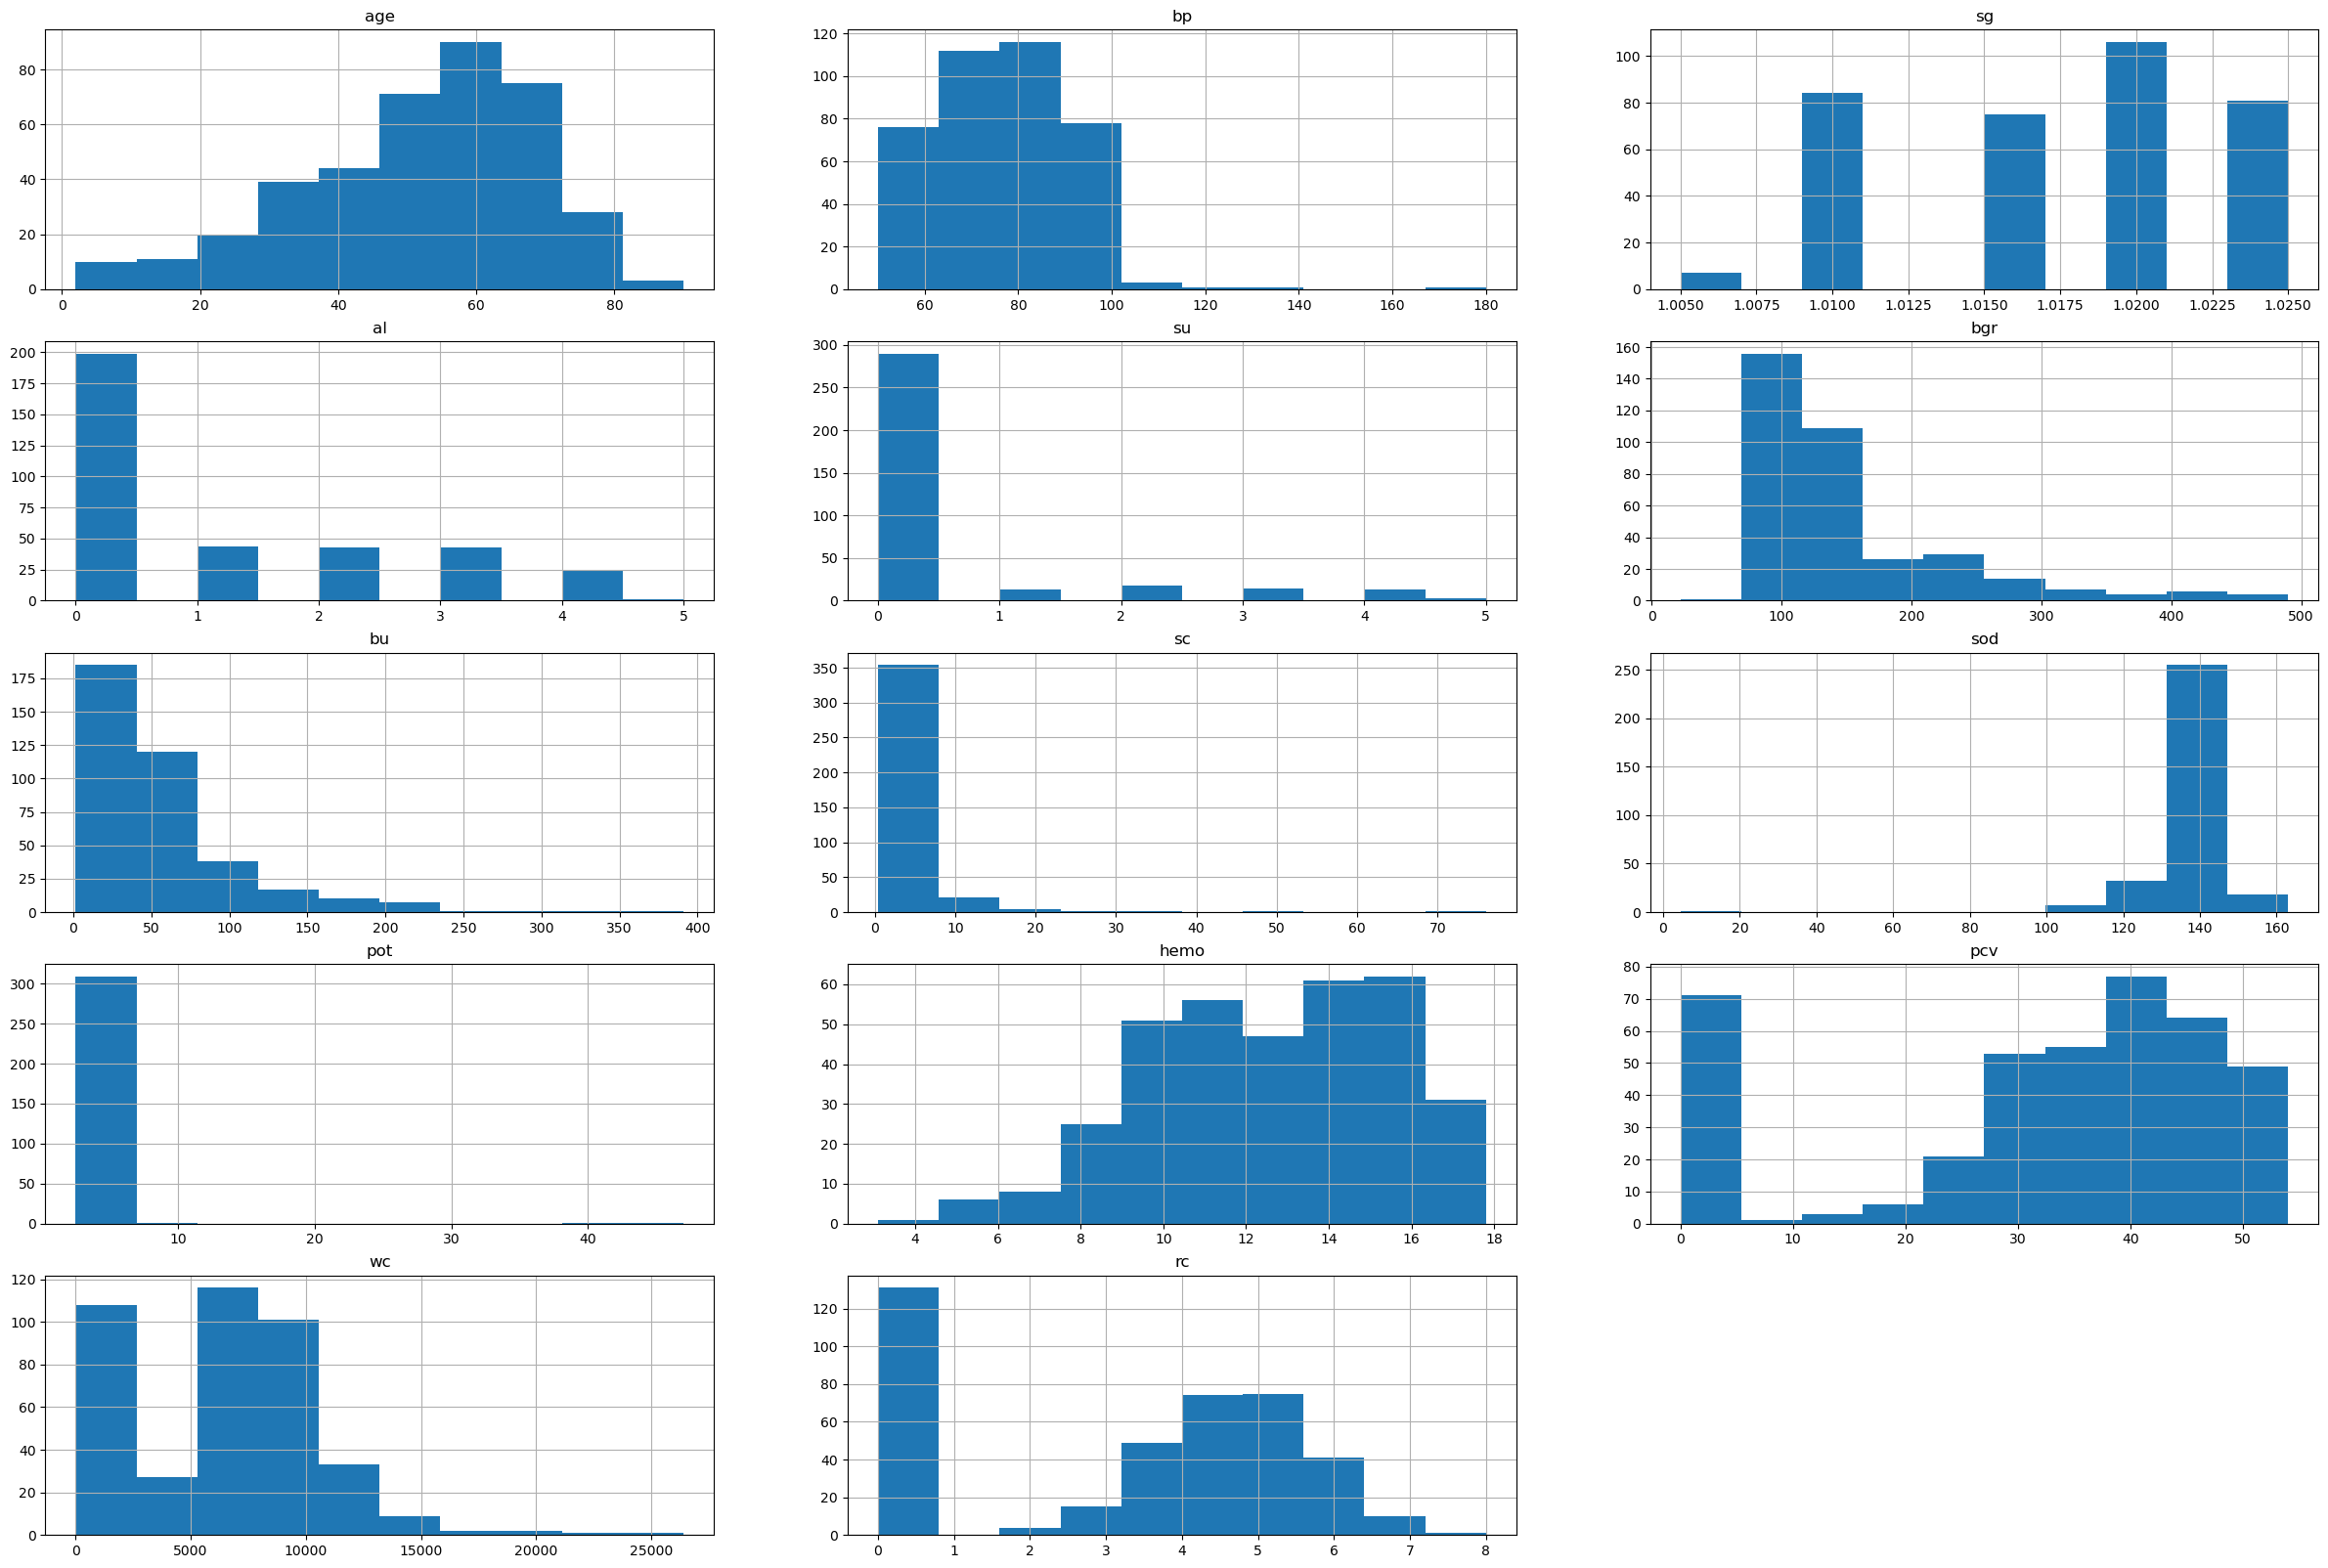

In [23]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_df):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

Observations :

    l'âge semble un peu biaisé
    La glycémie aléatoire est bien asymétrique
    L'urée sanguine est également un peu asymétrique
    Le reste des fonctionnalités est légèrement biaisé

Affichage toutes les modalités de toutes les variables catégorielles de data.

In [24]:
display(cat_data.describe())
display(cat_data.nunique())

cat_data.value_counts()

for i in cat_data:
	print(str(i),':',data[str(i)].unique())



,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,258,362,317,323,339,248


rbc               2
pc                2
pcc               2
ba                2
htn               2
dm                5
cad               3
appet             2
pe                2
ane               2
classification    3
dtype: int64

rbc : [nan 'normal' 'abnormal']
pc : ['normal' 'abnormal' nan]
pcc : ['notpresent' 'present' nan]
ba : ['notpresent' 'present' nan]
htn : ['yes' 'no' nan]
dm : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad : ['no' 'yes' '\tno' nan]
appet : ['good' 'poor' nan]
pe : ['no' 'yes' nan]
ane : ['no' 'yes' nan]
classification : ['ckd' 'ckd\t' 'notckd']


Nous avons beaucoup des variables YES/no donc on peux les encoder 1/-1

In [25]:
cat_data = cat_data.replace(to_replace=['yes', 'no'], value=[1, -1])
cat_data = cat_data.replace(to_replace=['\tyes', '\tno'], value=[1, -1])
cat_data = cat_data.replace(to_replace=[' yes'], value=[1])
cat_data = cat_data.replace(to_replace=['normal', 'abnormal'], value=[1, -1])
cat_data = cat_data.replace(to_replace=['present', 'notpresent'], value=[1, -1])
cat_data = cat_data.replace(to_replace=['normal', 'abnormal'], value=[1, -1])
cat_data = cat_data.replace(to_replace=['good', 'poor'], value=[1, -1])
cat_data = cat_data.replace(to_replace=['ckd', 'notckd'], value=[1, 0])
cat_data = cat_data.replace(to_replace=['ckd', 'notckd'], value=[1, 0])
cat_data = cat_data.replace(to_replace=['ckd\t'], value=[1])


In [16]:
columns_to_display = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for column in columns_to_display:
    display(f'Colonne {column}', cat_data[column].unique())

'Colonne rbc'

array([nan,  1., -1.])

'Colonne pc'

array([ 1., -1., nan])

'Colonne pcc'

array([-1.,  1., nan])

'Colonne ba'

array([-1.,  1., nan])

'Colonne htn'

array([ 1., -1., nan])

'Colonne dm'

array([ 1., -1., nan])

'Colonne cad'

array([-1.,  1., nan])

'Colonne appet'

array([ 1., -1., nan])

'Colonne pe'

array([-1.,  1., nan])

'Colonne ane'

array([-1.,  1., nan])

'Colonne classification'

array([1, 0], dtype=int64)

Pour finir le nettoyage des données, il faut gérer les valeurs manquantes pour les variables catégorielles qu'il va falloir remplacer ici par la valeur la plus fréquente de chaques modalités
.

In [30]:
cat_data.fillna(cat_data.mode,inplace=True)
cat_data.isnull().sum(axis=0)

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [29]:
columns_to_display = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for column in columns_to_display:
    display(f'Colonne {column}', cat_data[column].unique())

'Colonne rbc'

RecursionError: maximum recursion depth exceeded

'Colonne pc'

RecursionError: maximum recursion depth exceeded

'Colonne pcc'

RecursionError: maximum recursion depth exceeded

'Colonne ba'

RecursionError: maximum recursion depth exceeded

'Colonne htn'

RecursionError: maximum recursion depth exceeded

'Colonne dm'

RecursionError: maximum recursion depth exceeded

'Colonne cad'

RecursionError: maximum recursion depth exceeded

'Colonne appet'

RecursionError: maximum recursion depth exceeded

'Colonne pe'

RecursionError: maximum recursion depth exceeded

'Colonne ane'

RecursionError: maximum recursion depth exceeded

'Colonne classification'

array([1, 0], dtype=int64)

In [50]:
cat_data.to_csv('clean_data_cat.csv')